In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('twitter_training.csv')

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [5]:
df.shape

(74681, 4)

In [6]:
column_names = ['id',  'location', 'response', 'text'] 
df = pd.read_csv('twitter_training.csv', names=column_names)

In [7]:
df.head()

,id,location,response,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
df['location'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [9]:
df['id'].unique()

array([2401, 2402, 2403, ..., 9198, 9199, 9200], dtype=int64)

In [10]:
df['response'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [11]:
import re

In [12]:
print(df.dtypes)

id           int64
location    object
response    object
text        object
dtype: object


In [13]:
df['text'] = df['text'].astype(str)

In [14]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

In [15]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [16]:
df.dropna(subset=['cleaned_text'], inplace=True)

In [17]:
df.isnull().sum()

id              0
location        0
response        0
text            0
cleaned_text    0
dtype: int64

In [18]:
df.head()

,id,location,response,text,cleaned_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
df['sentiment'] = df['cleaned_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [22]:
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [23]:
df.head()

,id,location,response,text,cleaned_text,sentiment,sentiment_class
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,-0.6908,negative
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,-0.6908,negative
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,-0.6908,negative
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,-0.6908,negative
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,-0.6908,negative


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\prash\AppData\Local\Temp\ipykernel_9528\248112993.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_class', data=df, palette='viridis')


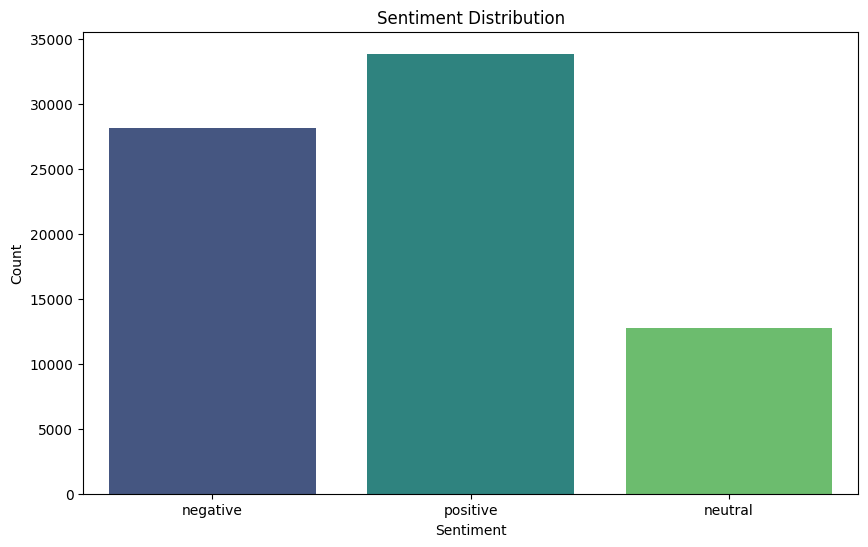

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_class', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [26]:
unique_locations = df['location'].unique()
unique_responses = df['response'].unique()

In [27]:
print(unique_locations)

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


In [28]:
print(f'Unique locations: {unique_locations}')
print(f'Unique responses: {unique_responses}')

Unique locations: ['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']
Unique responses: ['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [30]:
# Aggregate data by sentiment class
aggregated_data = df.groupby('sentiment_class')['response'].sum().reset_index()

# Display the aggregated data
print(aggregated_data)


  sentiment_class                                           response
0        negative  PositivePositivePositivePositivePositivePositi...
1         neutral  PositiveNeutralNeutralNeutralNeutralNeutralNeu...
2        positive  PositivePositivePositivePositivePositiveNeutra...


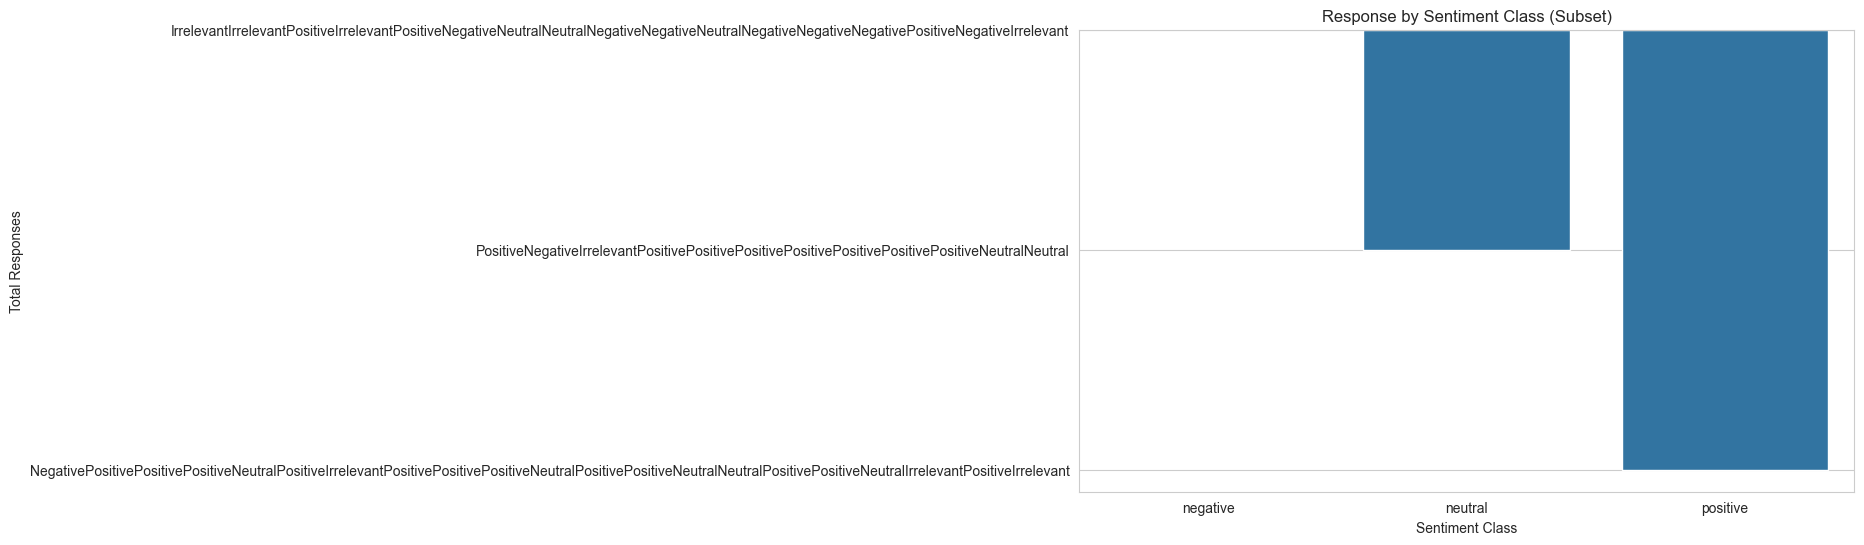

In [35]:
subset_df = df.sample(n=50, random_state=42)

aggregated_data = subset_df.groupby('sentiment_class')['response'].sum().reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment_class', y='response', data=aggregated_data)

plt.title('Response by Sentiment Class (Subset)')
plt.xlabel('Sentiment Class')
plt.ylabel('Total Responses')

plt.show()